# Conformal prediction for Classifiers

### Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

### Train and test datasets

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(7*7*32, 1000)
        self.fc2 = nn.Linear(1000, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = ConvNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Test the model
model.eval()  # Set the model to evaluation mode (disables dropout)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

Epoch [1/5], Step [100/600], Loss: 0.1781
Epoch [1/5], Step [200/600], Loss: 0.1665
Epoch [1/5], Step [300/600], Loss: 0.1699
Epoch [1/5], Step [400/600], Loss: 0.0336
Epoch [1/5], Step [500/600], Loss: 0.0402
Epoch [1/5], Step [600/600], Loss: 0.0866
Epoch [2/5], Step [100/600], Loss: 0.0396
Epoch [2/5], Step [200/600], Loss: 0.0070
Epoch [2/5], Step [300/600], Loss: 0.0822
Epoch [2/5], Step [400/600], Loss: 0.0231
Epoch [2/5], Step [500/600], Loss: 0.0248
Epoch [2/5], Step [600/600], Loss: 0.0512
Epoch [3/5], Step [100/600], Loss: 0.1017
Epoch [3/5], Step [200/600], Loss: 0.0272
Epoch [3/5], Step [300/600], Loss: 0.0673
Epoch [3/5], Step [400/600], Loss: 0.0201
Epoch [3/5], Step [500/600], Loss: 0.0489
Epoch [3/5], Step [600/600], Loss: 0.0104
Epoch [4/5], Step [100/600], Loss: 0.0256
Epoch [4/5], Step [200/600], Loss: 0.0176
Epoch [4/5], Step [300/600], Loss: 0.0607
Epoch [4/5], Step [400/600], Loss: 0.1672
Epoch [4/5], Step [500/600], Loss: 0.0612
Epoch [4/5], Step [600/600], Loss:

### Batch definition

## Multilayer perceptron
### Definition

### Hyperparameters, loss function and optimizer

### Train and test code definition

### Training

### Example

In [9]:
def show_img_class(img, y):
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()
    print(y)

In [22]:
img, y = next(iter(test_loader))

TypeError: Invalid shape (100, 28, 28) for image data

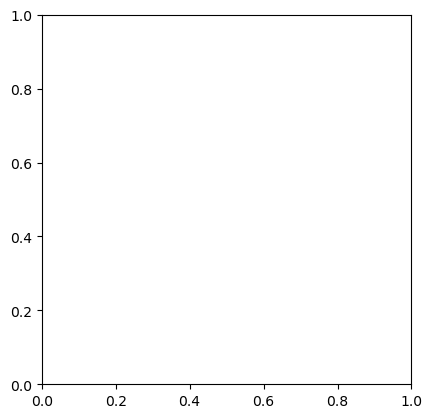

In [25]:
show_img_class(img, y)

In [23]:
img = img.to(device)

In [24]:
model.eval()
with torch.no_grad():
    output = model(img)
print(output)

tensor([[-5.9860e+00,  1.9131e+00,  7.3537e-02,  3.3929e+00, -7.5037e+00,
         -5.2950e+00, -9.5118e+00,  2.0419e+01, -2.8274e+00,  1.6150e+00],
        [ 3.3496e+00,  5.5800e+00,  1.7620e+01,  1.8380e-01, -9.0810e-01,
         -1.2905e+01,  2.9568e+00, -5.0171e+00,  1.3114e+00, -4.8828e+00],
        [-1.2203e+00,  1.4014e+01, -2.9109e+00, -4.1198e+00,  3.3495e+00,
         -1.9990e+00, -1.5460e+00,  2.5542e+00, -1.2634e+00, -3.0122e+00],
        [ 1.8051e+01, -7.2395e+00, -2.4095e+00, -5.6805e+00, -7.7377e+00,
         -4.9546e+00,  7.1877e+00, -2.6646e+00,  4.7450e+00, -3.6170e-01],
        [-1.1609e+01,  4.9357e+00, -3.6111e+00, -5.7160e+00,  2.4417e+01,
         -8.3227e+00, -4.4025e+00,  2.0409e+00,  1.1171e+00,  7.1878e+00],
        [-6.0080e-01,  1.5515e+01, -1.7389e+00, -5.3339e+00,  2.8158e+00,
         -5.1980e+00, -1.5319e+00,  3.7911e+00, -3.9241e-01, -2.3027e+00],
        [-1.5621e+01,  2.3284e+00, -3.9359e+00, -7.5590e+00,  2.1144e+01,
         -7.1696e+00, -5.2292e+0

In [26]:
output.sum().item()

-278.7170715332031

### not_so_sure

In [19]:
not_so_sure = []
model.eval()
with torch.no_grad():
    for elem in test_data:
        output = model(elem[0])
        if output[0].max().item() < 0.6:
            not_so_sure.append(elem)

In [20]:
len(not_so_sure)

313

In [21]:
img, y = not_so_sure[1]
model.eval()
with torch.no_grad():
    output = model(img)
print(output)

tensor([[1.5422e-04, 1.1521e-07, 5.8984e-01, 2.4448e-05, 7.1862e-09, 1.1442e-05,
         6.3286e-06, 4.0972e-01, 2.0477e-04, 3.6491e-05]])


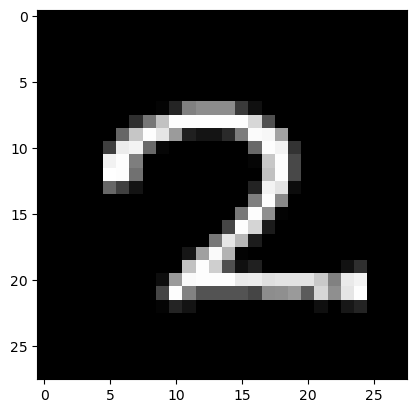

2


In [22]:
show_img_class(img, y)

## Conformal prediction and uncertainty quantification

In [23]:
len(test_data)

10000

In [24]:
num_samples = 100
alpha = 0.1

In [25]:
calib_dataset = Subset(test_data, torch.arange(num_samples))

### Old method

In [26]:
list_scores = []
model.eval()
with torch.no_grad():
    for img, y in calib_dataset:
        correct_class_score = model(img).flatten()[y]
        list_scores.append(correct_class_score)

In [27]:
# alpha_hat = ?

In [28]:
q = np.quantile(list_scores, alpha, method='lower')
print(q)

0.58983845


### New method

In [29]:
model

NumberNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [30]:
# Es podria fer més d'una predicció alhora amb DataLoader si es treballa amb GPU

In [31]:
list_sum_scores = []
model.eval()
with torch.no_grad():
    for img, y in calib_dataset:
        scores = list(enumerate(model(img).flatten()))
        scores_until_correct = [score for num, score in scores if score >= scores[y][1]]  # or num == y
        list_sum_scores.append(sum(scores_until_correct))

In [32]:
p = 1-alpha
print(p)

0.9


In [33]:
p_hat = ceil((num_samples+1)*p) / num_samples
print(p_hat)

0.91


In [34]:
q_hat = np.quantile(list_sum_scores, p_hat, method='higher')
print(q_hat)

0.9999999


### Getting prediction sets

In [35]:
def get_prediction_list(img):
    prediction_list = []
    sorted_scores = sorted(enumerate(model(img).flatten()), key=lambda item: item[1], reverse=True)
    cumsum = 0
    for num, score in sorted_scores:
        cumsum += score
        prediction_list.append(num)
        if cumsum >= q_hat:
            break
    return prediction_list

In [36]:
def run_predictions_data(data):
    df = pd.DataFrame(columns=['true_class', 'prediction_list'])
    model.eval()
    with torch.no_grad():
        for idx, (img, y) in enumerate(data):
            df.loc[len(df)] = {'true_class': y, 'prediction_list': get_prediction_list(img)}
    return df

In [37]:
remaining_test_data = Subset(test_data, torch.arange(num_samples, len(test_data)))
print(len(remaining_test_data))

9900


In [38]:
results = run_predictions_data(remaining_test_data)
display(results)

,true_class,prediction_list
0,6,"[6, 2, 8, 0, 4, 5]"
1,0,"[0, 8, 2]"
2,5,"[8, 3, 9, 7, 0, 5, 4]"
3,4,"[4, 9]"
4,9,"[9, 4, 8, 7, 2, 5, 3, 0]"
...,...,...
9895,2,[2]
9896,3,[3]
9897,4,"[4, 9, 8]"
9898,5,"[8, 6, 4, 0, 5, 1, 3, 2]"


### Some data

Let's see the average list size for correctly predicted classes vs incorrect ones.

**No hi ha classes correctes i incorrectes com a tal, però entenc que no té sentit retornar el conjunt sense ordre...**

In [39]:
sizes_correct = {length: 0 for length in range(1, 11)}
sizes_incorrect = {length: 0 for length in range(1, 11)}

def calculate_sizes(row):
    if row['true_class'] == row['prediction_list'][0]:
        sizes_correct[len(row['prediction_list'])] += 1
    else:
        sizes_incorrect[len(row['prediction_list'])] += 1

model.eval()
with torch.no_grad():
    results.apply(calculate_sizes, axis=1)

In [40]:
def compute_avg_size(sizes):
    total = sum(sizes.values())
    relative = {length: size/total for length, size in sizes.items()}
    avg_size = sum(length*percent for length, percent in relative.items())
    return avg_size

In [41]:
print(compute_avg_size(sizes_correct))
print(compute_avg_size(sizes_incorrect))

4.2732073700269915
6.912980420594633


In [42]:
sizes_total = {length: sizes_correct[length]+sizes_incorrect[length] for length in sizes_correct}

In [43]:
def plot_histogram(sizes, name):
    keys, values = list(sizes.keys()), list(sizes.values())
    plt.bar(keys, values)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

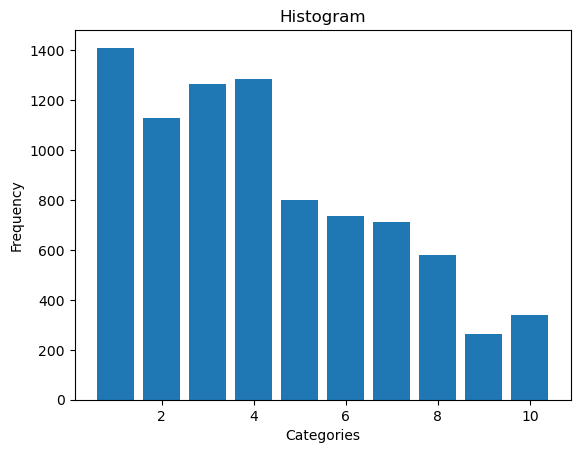

In [44]:
plot_histogram(sizes_correct, 'Correct')

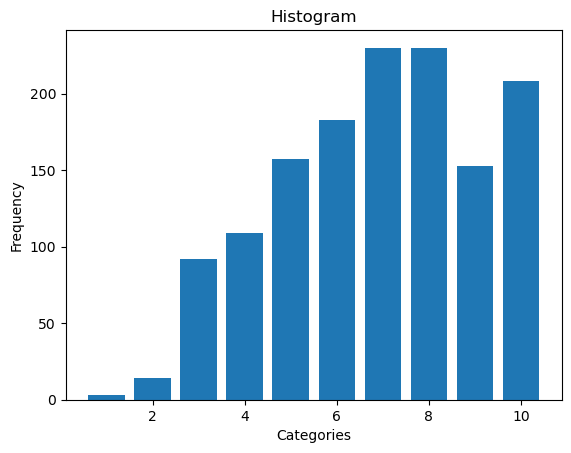

In [45]:
plot_histogram(sizes_incorrect, 'Incorrect')

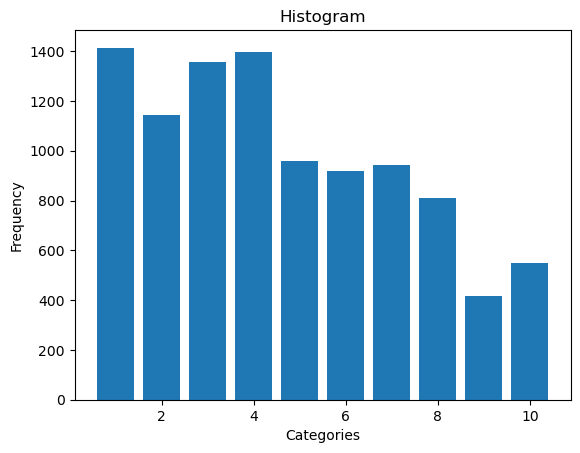

In [46]:
plot_histogram(sizes_total, 'Total')